# Load Dataset and Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('ETH-USD.csv')
df.head()

,timestamp,open,high,low,close
0,1654041540,1938.145163,undefined,undefined,undefined
1,1653955200,1998.371773,2011.2465624406884,1927.9031214198715,1938.0697577626775
2,1653955140,1999.793524,undefined,undefined,undefined
3,1653868800,1811.090938,2009.3175200841836,1801.5913046385842,1995.9571945130378
4,1653782400,1790.187455,1822.9062920657475,1763.991491514957,1812.782662918136


In [3]:
df.shape[0]

2788

In [4]:
df.sort_values(by='timestamp', inplace=True)

In [5]:
df['date'] = pd.to_datetime(df['timestamp'], unit="s")
df['date'] = pd.to_datetime(df['date'].dt.strftime('%Y-%m-%d'))
df

,timestamp,open,high,low,close,date
2787,1438905600,3.000000,undefined,undefined,undefined,2015-08-07
2786,1438992000,1.200000,undefined,undefined,undefined,2015-08-08
2785,1439078400,1.200000,undefined,undefined,undefined,2015-08-09
2784,1439164800,1.200000,undefined,undefined,undefined,2015-08-10
2783,1439251200,0.990000,undefined,undefined,undefined,2015-08-11
...,...,...,...,...,...,...
4,1653782400,1790.187455,1822.9062920657475,1763.991491514957,1812.782662918136,2022-05-29
3,1653868800,1811.090938,2009.3175200841836,1801.5913046385842,1995.9571945130378,2022-05-30
2,1653955140,1999.793524,undefined,undefined,undefined,2022-05-30
1,1653955200,1998.371773,2011.2465624406884,1927.9031214198715,1938.0697577626775,2022-05-31


In [6]:
df = df.drop_duplicates(subset=['date'], keep='first')

In [7]:
df = df.reset_index()

In [8]:
cols = ['date', 'open']
df = df[cols]
df.head()

,date,open
0,2015-08-07,3.00
1,2015-08-08,1.20
2,2015-08-09,1.20
3,2015-08-10,1.20
4,2015-08-11,0.99


In [9]:
df = df[df['date'] >= '2020-05-31']
df = df.reset_index()
cols = ['date', 'open']
df = df[cols]

In [10]:
df.to_csv(r'ETH-USD-2020-and-after.csv')

In [11]:
df

,date,open
0,2020-05-31,243.679407
1,2020-06-01,231.112668
2,2020-06-02,248.176877
3,2020-06-03,237.472874
4,2020-06-04,244.701079
...,...,...
725,2022-05-27,1790.973694
726,2022-05-28,1726.926152
727,2022-05-29,1790.187455
728,2022-05-30,1811.090938


# FEDOT API

In [12]:
# pip install fedot

In [13]:
# FEDOT api
from fedot.api.main import Fedot# Tasks to solve
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams# Input data for fit and predict
from fedot.core.data.data import InputData# Train and test split
#from fedot.core.data.data import train_test_data_setup
from fedot.core.data.data_split import train_test_data_setup

In [14]:
forecast_length = 20
task = Task(TaskTypesEnum.ts_forecasting, TsForecastingParams(forecast_length=forecast_length))

In [15]:
# Load data from csv file and wrap it into InputData structure
input_data = InputData.from_csv_time_series(task, 'ETH-USD-2020-and-after.csv', target_column='open')# Divide into train and test
train_data, test_data = train_test_data_setup(input_data)

In [16]:
# Init model for the time series forecasting
model = Fedot(problem='ts_forecasting',task_params=task.task_params)# Run AutoML model design
chain = model.fit(features=train_data)# Use model to obtain forecast
forecast = model.predict(features=test_data)

Generations:   1%|▊                                                                           | 1/100 [00:00<?, ?gen/s]

Number of used CPU's: 1
Number of used CPU's: 1
Number of used CPU's: 1


Generations:   2%|█▎                                                                  | 2/100 [00:31<51:06, 31.30s/gen]

Number of used CPU's: 1


Generations:   3%|██                                                                  | 3/100 [00:49<38:34, 23.86s/gen]

Number of used CPU's: 1


Generations:   4%|██▋                                                                 | 4/100 [01:08<34:31, 21.58s/gen]

Number of used CPU's: 1


Generations:   5%|███▍                                                                | 5/100 [01:32<35:23, 22.35s/gen]

Number of used CPU's: 1


Generations:   6%|████                                                                | 6/100 [01:57<36:25, 23.25s/gen]

Number of used CPU's: 1


Generations:   7%|████▊                                                               | 7/100 [02:24<38:05, 24.58s/gen]

Number of used CPU's: 1


Generations:   8%|█████▍                                                              | 8/100 [02:54<38:10, 24.89s/gen]

Hyperparameters optimization start


  1%|▌                                            | 13/1000 [02:18<2:55:46, 10.69s/trial, best loss: 275.4985556118647]
Hyperparameters optimization finished
Return tuned pipeline due to the fact that obtained metric 272.386 equal or smaller than initial (+ 5% deviation) 367.889


In [17]:
len(forecast)

20

In [18]:
import numpy as np
from sklearn.metrics import mean_absolute_error
traffic = np.array(df['open'])
def display_results(actual_time_series, predicted_values, len_train_data, y_name = 'Ethereum volume'): 
        
    plt.plot(np.arange(0, len(actual_time_series)), actual_time_series, label = 'Actual values', c = 'green')
    plt.plot(np.arange(len_train_data, len_train_data + len(predicted_values)), 
             predicted_values, label = 'Predicted', c = 'blue')
  
    plt.ylabel(y_name, fontsize = 15)
    plt.xlabel('Time index', fontsize = 15)
    plt.legend(fontsize = 15, loc='upper left')
    plt.grid()
    plt.show()
    #plt.savefig('eth.png')

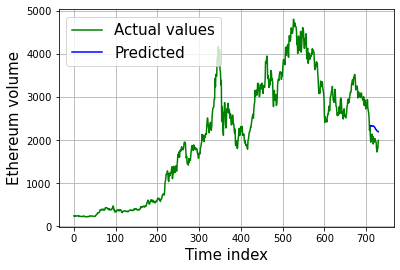

In [19]:
display_results(df['open'], forecast, 730-len(forecast), y_name = 'Ethereum volume')

In [20]:
import numpy as np
from sklearn.metrics import mean_absolute_error
traffic = np.array(df['open'])
def display_results_zoomed_in(actual_time_series, predicted_values, len_train_data, y_name = 'Ethereum volume'): 
        
    plt.plot(np.arange(0, len(actual_time_series)), actual_time_series, label = 'Actual values', c = 'green')
    plt.plot(np.arange(len_train_data, len_train_data + len(predicted_values)), 
             predicted_values, label = 'Predicted', c = 'blue')
  
    plt.ylabel(y_name, fontsize = 15)
    plt.xlabel('Time index', fontsize = 15)
    plt.legend(fontsize = 15, loc='upper left')
    plt.grid()
    plt.xlim(690,730)
    plt.show()
    plt.savefig('eth.png')

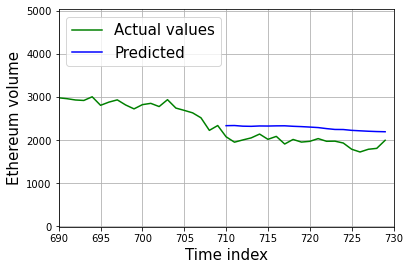

<Figure size 432x288 with 0 Axes>

In [21]:
display_results_zoomed_in(df['open'], forecast, 730-len(forecast), y_name = 'Ethereum volume')

In [22]:
from sklearn.metrics import mean_absolute_error
mae_value = mean_absolute_error(df['open'][730-len(forecast):], forecast)
print(f'MAE value: {mae_value}')

MAE value: 322.90312372823234


# AUTO SKLEARN API

In [23]:
#pip install skforecast --user

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')

In [25]:
data = df
data

,date,open
0,2020-05-31,243.679407
1,2020-06-01,231.112668
2,2020-06-02,248.176877
3,2020-06-03,237.472874
4,2020-06-04,244.701079
...,...,...
725,2022-05-27,1790.973694
726,2022-05-28,1726.926152
727,2022-05-29,1790.187455
728,2022-05-30,1811.090938


In [26]:
data = data.set_index('date')
data = data.rename(columns={'open': 'y'})

In [27]:
data = data.sort_index()
data.head()

,y
date,
2020-05-31,243.679407
2020-06-01,231.112668
2020-06-02,248.176877
2020-06-03,237.472874
2020-06-04,244.701079


In [28]:
print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [29]:
data.index.max()

Timestamp('2022-05-31 00:00:00')

In [30]:
data.shape[0]

730

Train dates : 2020-05-31 00:00:00 --- 2022-05-12 00:00:00  (n=711)
Test dates  : 2022-05-12 00:00:00 --- 2022-05-31 00:00:00  (n=20)


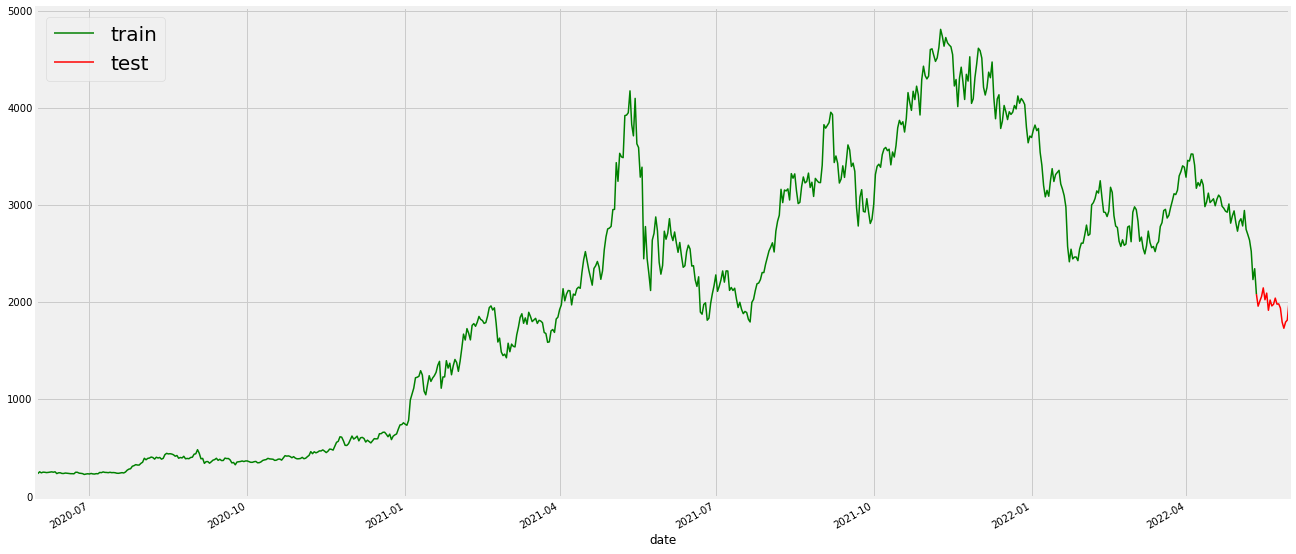

In [31]:
steps = 20
data_train = data[:len(data)-steps+1]
data_test  = data[len(data)-steps:]


print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax=plt.subplots(figsize=(20, 10))
data_train['y'].plot(ax=ax, label='train', color='green')
data_test['y'].plot(ax=ax, label='test', color = 'red')
plt.xlim('2020-05-31','2022-05-31')
plt.legend(fontsize = 20, loc='upper left')
plt.show()

In [32]:
scaler=MinMaxScaler(feature_range=(0,1))
target=scaler.fit_transform(np.array(data_train['y']).reshape(-1,1))

In [33]:
data_train['fitted'] = target
data_train

,y,fitted
date,,
2020-05-31,243.679407,0.004964
2020-06-01,231.112668,0.002223
2020-06-02,248.176877,0.005945
2020-06-03,237.472874,0.003610
2020-06-04,244.701079,0.005187
...,...,...
2022-05-08,2634.805943,0.526467
2022-05-09,2519.404935,0.501298
2022-05-10,2228.472370,0.437846


In [34]:
forecaster = ForecasterAutoreg(regressor = RandomForestRegressor(random_state=123),lags = 6)
#forecaster.fit(y=data_train['y'])
forecaster.fit(y = data_train['fitted'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Window size: 6 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 710] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-06-20 11:52:38 
Last fit date: 2022-06-20 11:52:38 
Skforecast version: 0.4.3 

In [35]:
predictions = forecaster.predict(steps=steps).to_frame()
predictions

,pred
711,0.423500
712,0.415329
713,0.419007
714,0.411031
715,0.412712
716,0.405053
717,0.392613
718,0.395055
719,0.400005
720,0.407261


In [36]:
actual_fitted_pred = predictions['pred'].to_numpy()

In [37]:
actual_pred = scaler.inverse_transform(actual_fitted_pred.reshape(-1, 1))

In [38]:
actual_pred

array([[2162.69794928],
       [2125.23072617],
       [2142.09712575],
       [2105.52554158],
       [2113.23069771],
       [2078.1151    ],
       [2021.07857975],
       [2032.27422918],
       [2054.96931419],
       [2088.24114843],
       [2109.65133383],
       [2123.81831812],
       [2140.16657264],
       [2170.61972867],
       [2259.62090002],
       [2274.55234236],
       [2282.94947802],
       [2302.13411611],
       [2323.03789185],
       [2341.80351398]])

In [39]:
data_test['predictions'] = actual_pred

In [40]:
#data_test['predictions'] = predictions['pred'].values

In [41]:
data_train

,y,fitted
date,,
2020-05-31,243.679407,0.004964
2020-06-01,231.112668,0.002223
2020-06-02,248.176877,0.005945
2020-06-03,237.472874,0.003610
2020-06-04,244.701079,0.005187
...,...,...
2022-05-08,2634.805943,0.526467
2022-05-09,2519.404935,0.501298
2022-05-10,2228.472370,0.437846


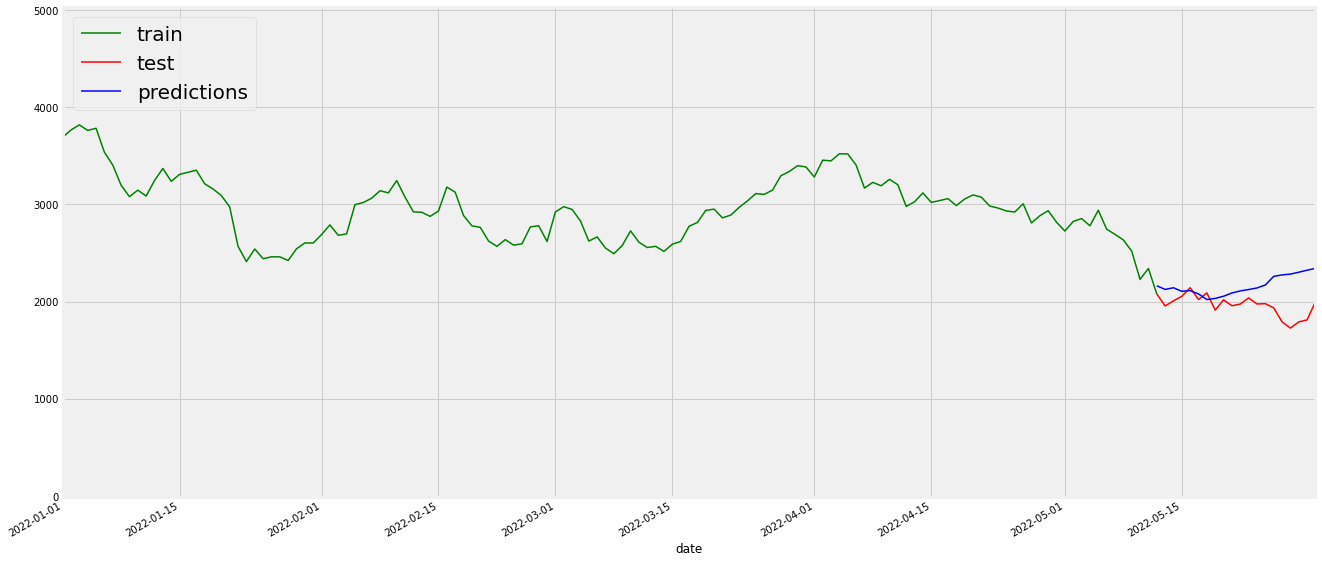

In [42]:
fig, ax = plt.subplots(figsize=(20, 10))
data_train['y'].plot(ax=ax, label='train', color = 'green')
data_test['y'].plot(ax=ax, label='test', color = 'red')
data_test['predictions'].plot(ax=ax, label='predictions', color = 'blue')
plt.xlim('2022-01-01','2022-05-31')
plt.legend(fontsize = 20, loc='upper left')
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error
mae_value = mean_absolute_error(data_test['y'], data_test['predictions'])
print(f'MAE value: {mae_value}')

MAE value: 209.80232469862435


# Auto-TS API

## AutoTimeSeries Framework Installation

In [44]:
# conda install libpython m2w64-toolchain -c msys2

In [45]:
# pip install pystan

In [46]:
# pip install fbprophet

In [47]:
# pip install auto-ts

In [48]:
# pip install tscv

In [49]:
# pip install "dask[distributed]"

In [50]:
# !pip install lightgbm

In [51]:
# pip install --upgrade plotly

## Data Preprocessing

In [52]:
from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.64. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [53]:
df['date'] = pd.to_datetime(df['date'])

In [54]:
df = df.sort_values('date')

In [55]:
df

,date,open
0,2020-05-31,243.679407
1,2020-06-01,231.112668
2,2020-06-02,248.176877
3,2020-06-03,237.472874
4,2020-06-04,244.701079
...,...,...
725,2022-05-27,1790.973694
726,2022-05-28,1726.926152
727,2022-05-29,1790.187455
728,2022-05-30,1811.090938


## Split Dataset to train and test

In [56]:
timestep = 30
train_df = df.iloc[:len(df)-timestep +1]   # take the first 731-timestep rows
test_df = df.iloc[len(df)-timestep:]       # take the last timestep rows

## Plot Train and Test

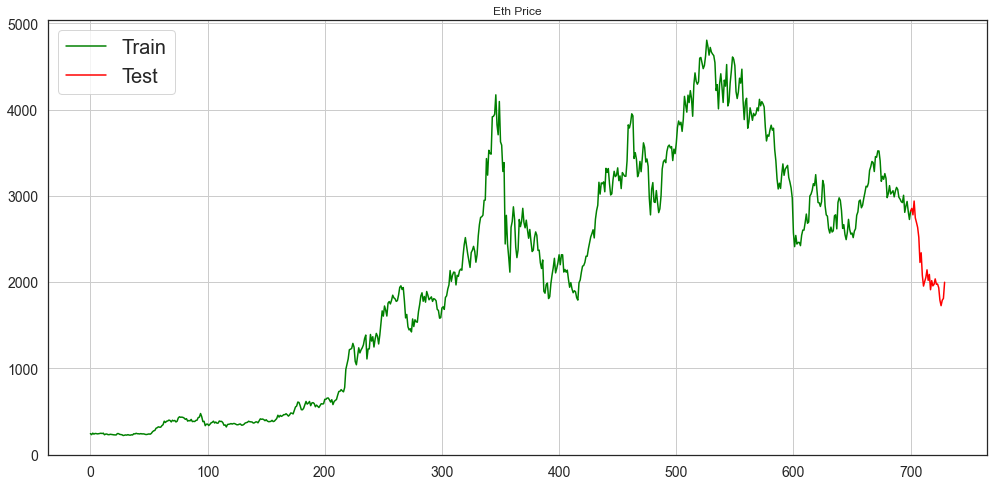

In [57]:
train_df.open.plot(figsize=(15,8), title= 'Eth Price', fontsize=14, label='Train', color = 'green')
test_df.open.plot(figsize=(15,8), title= 'Eth Price', fontsize=14, label='Test', color='red')
plt.legend(fontsize = 20, loc='upper left')
plt.grid()
plt.show()

Start of Fit.....
    Target variable given as = open
Start of loading of data.....
    Inputs: ts_column = date, sep = ,, target = ['open']
    Using given input: pandas dataframe...
    date column exists in given train data...
    train data shape = (701, 1)
Alert: Could not detect strf_time_format of date. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model
No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train S

 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8687.229, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8686.475, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8686.475, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8688.476, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=8683.286, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8685.293, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=8685.281, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=8683.331, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=8687.285, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.982 seconds
Refitting data with previously found best parameters
    Best aic metric = 8663.2
                               SARIMAX Results                                
Dep. Variable:                   open   No. Observations:                  701
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -4327.606
Date:     

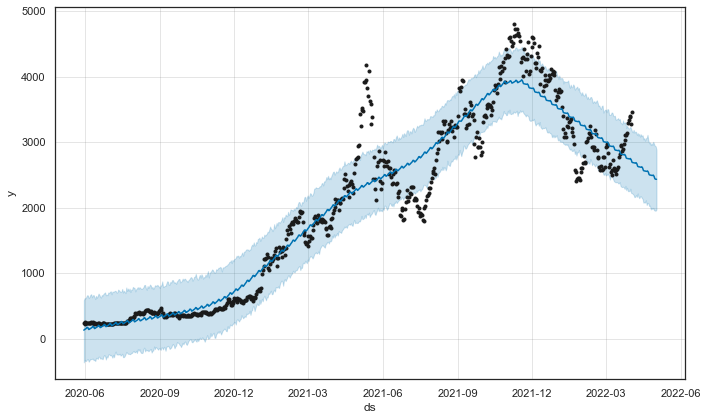

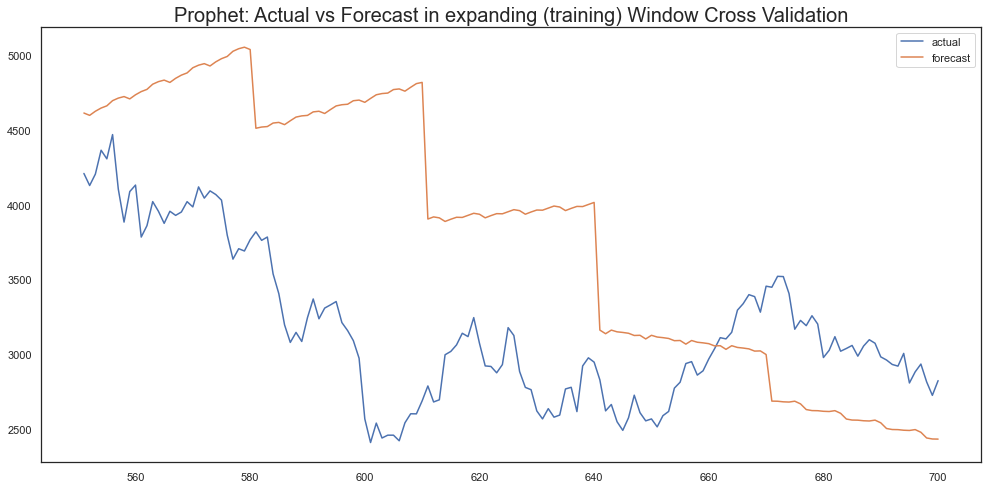

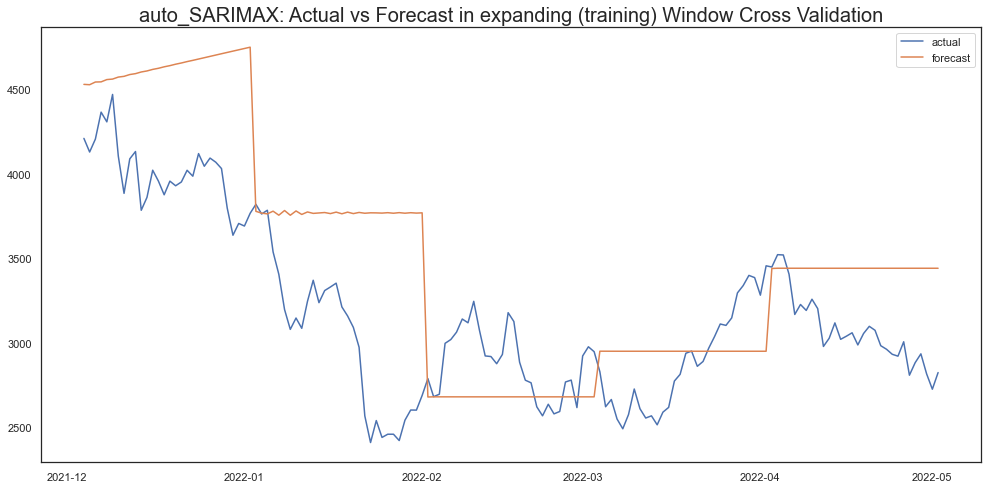

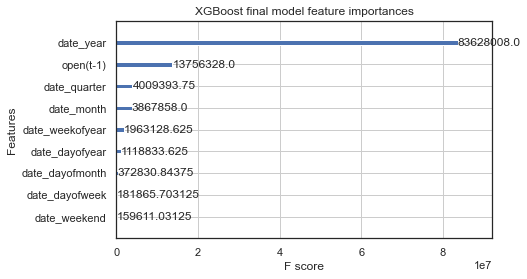

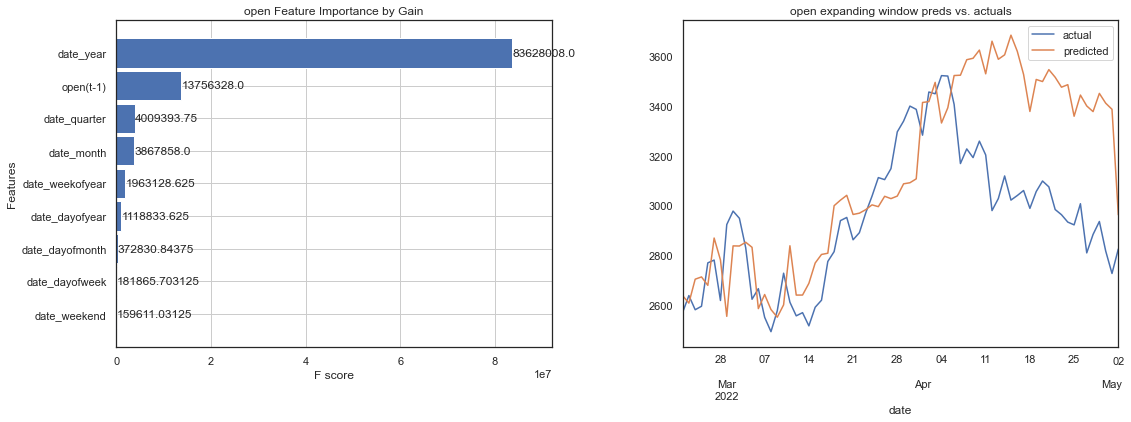

In [58]:
model = auto_timeseries(forecast_period=30, score_type='rmse', time_interval='D', model_type='best')

model.fit(traindata= train_df, ts_column="date", target="open")

<AxesSubplot:xlabel='Model', ylabel='CV Scores'>

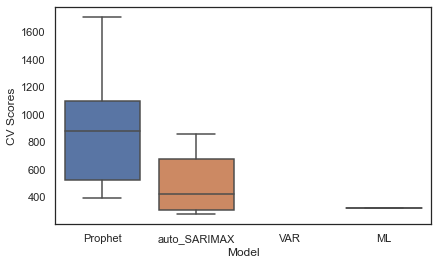

In [59]:
model.get_leaderboard()
model.plot_cv_scores()

## Predict Ethereum value

In [60]:
future_predictions = model.predict(test_df)

Predicting using test dataframe shape = (30, 2) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for date. Provide strf_time format during "setup" for better results.
ML predictions completed


In [61]:
future_predictions

,open,mean_se,mean_ci_lower,mean_ci_upper
date,,,,
2022-05-02,2804.690186,NaN,NaN,NaN
2022-05-03,2844.153809,NaN,NaN,NaN
2022-05-04,2883.565674,NaN,NaN,NaN
2022-05-05,2904.487549,NaN,NaN,NaN
2022-05-06,2977.506348,NaN,NaN,NaN
2022-05-07,3026.394043,NaN,NaN,NaN
2022-05-08,3045.266113,NaN,NaN,NaN
2022-05-09,3063.403809,NaN,NaN,NaN
2022-05-10,3066.403076,NaN,NaN,NaN


In [62]:
test_df['predicted'] = future_predictions['open'].values
#test_df['predicted'] = future_predictions['yhat'].values

In [63]:
#test_df

## Plot Predictions

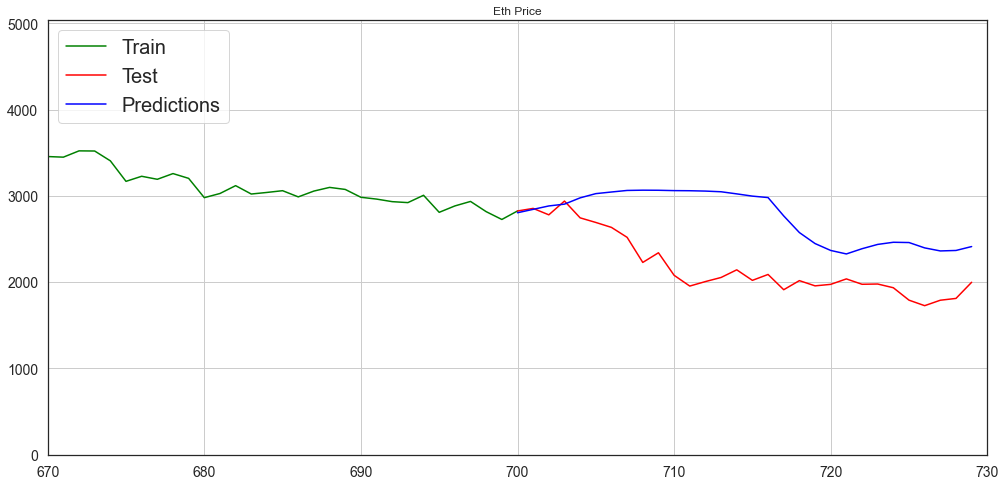

In [64]:
train_df.open.plot(figsize=(15,8), title= 'Eth Price', fontsize=14, label='Train', color = 'green')
test_df.open.plot(figsize=(15,8), title= 'Eth Price', fontsize=14, label='Test', color='red')
test_df.predicted.plot(figsize=(15,8), title= 'Eth Price', fontsize=14, label='Predictions', color='blue')
plt.legend(fontsize = 20, loc='upper left')
plt.xlim(len(df)-timestep*2, len(df))
plt.grid()
plt.show()

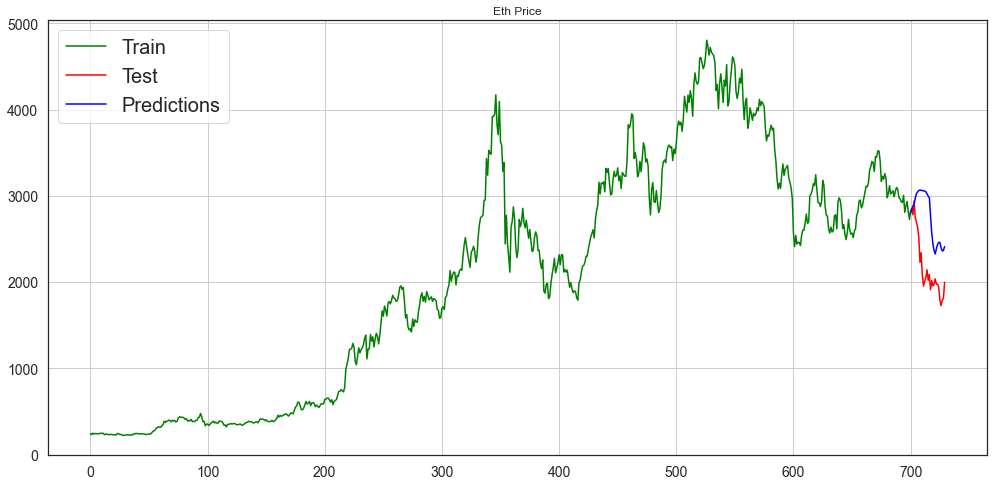

In [65]:
train_df.open.plot(figsize=(15,8), title= 'Eth Price', fontsize=14, label='Train', color = 'green')
test_df.open.plot(figsize=(15,8), title= 'Eth Price', fontsize=14, label='Test', color='red')
test_df.predicted.plot(figsize=(15,8), title= 'Eth Price', fontsize=14, label='Predictions', color='blue')
plt.legend(fontsize = 20, loc='upper left')
plt.grid()
plt.show()

In [66]:
from sklearn.metrics import mean_absolute_error
mae_value = mean_absolute_error(test_df['open'], test_df['predicted'])
print(f'MAE value: {mae_value}')

MAE value: 566.6815044140296
